In [1]:
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
import cv2
import pickle
import glob
import random
import itertools
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


from sklearn.tree import DecisionTreeClassifier  # 3
from sklearn.neural_network import MLPClassifier  # 4
from sklearn.ensemble import RandomForestClassifier  # 5



**1, 2, 3**

In [2]:
data_dir= r"C:\Users\reena\OneDrive\Desktop\DM-1\Cropped2"
classes = os.listdir(data_dir)
classes.sort()
sdata = r"C:\Users\reena\OneDrive\Desktop\DM-1\splitdata"

In [3]:
for c in classes:
    data = []
    path = os.path.join(data_dir,c)
    label = classes.index(c)
    for image in os.listdir(path):
        
        image_path = os.path.join(path,image)
        img = cv2.imread(image_path)
        
        # Convert the images to grayscale pixel intensity histograms
        scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.array(scale)
        
        hist,bins = np.histogram(img,bins=256,range=(0,256))
        hist = hist.flatten()
        
        #  Standardization on the dataset.
        feature = hist.reshape(-1,1)
        scaler = StandardScaler()
        std_feature = scaler.fit_transform(feature)
        std_feature = std_feature.flatten()

        data.append([std_feature,label])
    
    # Splitting data into train and test (80:20) for each class
    train,test = tts(data,train_size=0.8, test_size=0.2, random_state=2)
    
    dest_path = os.path.join(sdata,c)
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
        
    pick_in = open(os.path.join(dest_path,'train.pickle'),'wb')
    pickle.dump(train,pick_in)
    pick_in.close()
    
    pick_in = open(os.path.join(dest_path,'test.pickle'),'wb')
    pickle.dump(test,pick_in)
    pick_in.close()

    print(f"Class : {c}           Class label : {label}        No.of train images : {len(train)}     No.of test images : {len(test)}")

Class : n02093991-Irish_terrier           Class label : 0        No.of train images : 135     No.of test images : 34
Class : n02098413-Lhasa           Class label : 1        No.of train images : 148     No.of test images : 38
Class : n02102480-Sussex_spaniel           Class label : 2        No.of train images : 120     No.of test images : 31
Class : n02105412-kelpie           Class label : 3        No.of train images : 122     No.of test images : 31


In [4]:
train = []
for i in os.listdir(sdata):
    p = os.path.join(sdata,i,'train.pickle')
    p = open(p,'rb')
    t = pickle.load(p)
    train.extend(t)
    p.close()
test = []
for i in os.listdir(sdata):
    p = os.path.join(sdata,i,'test.pickle')
    p = open(p,'rb')
    t = pickle.load(p)
    test.extend(t)
    p.close()
random.shuffle(train)
random.shuffle(test)

In [5]:
xtrain = []
ytrain = []
xtest = []
ytest = []
for i in train:
    xtrain.append(i[0])
    ytrain.append(i[1])
for j in test:
    xtest.append(j[0])
    ytest.append(j[1])

In [6]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

**4**

In [7]:
k_values = [1, 3, 5, 7, 10, 20]

In [8]:
kf = KFold(n_splits=5)
std_train_error = []
std_val_error = []
for k in k_values:
    
    model = KNN(n_neighbors=k)
    train_scores = []
    val_scores = []
    

    for train_index, val_index in kf.split(xtrain, ytrain):
        X_train, X_val = xtrain[train_index], xtrain[val_index]
        y_train, y_val = ytrain[train_index], ytrain[val_index]

        model.fit(X_train, y_train)
        
        train_score = model.score(X_train, y_train)
        train_scores.append(1 - train_score)
        
        val_score = model.score(X_val, y_val)
        val_scores.append(1 - val_score)

    print(f"Results for k={k}:")
    std_train_error.append(np.mean(train_scores))
    print(f"Training Error: {np.mean(train_scores):.2f}")
    std_val_error.append(np.mean(val_scores))
    print(f"Validation Error: {np.mean(val_scores):.2f}")


Results for k=1:
Training Error: 0.00
Validation Error: 0.70
Results for k=3:
Training Error: 0.40
Validation Error: 0.65
Results for k=5:
Training Error: 0.43
Validation Error: 0.64
Results for k=7:
Training Error: 0.47
Validation Error: 0.63
Results for k=10:
Training Error: 0.51
Validation Error: 0.62
Results for k=20:
Training Error: 0.53
Validation Error: 0.60


In [9]:
stratified_kf = StratifiedKFold(n_splits=5)
strd_train_error = []
strd_val_error = []

for k in k_values:
    
    model = KNN(n_neighbors=k)
    train_scores = []
    val_scores = []
    
    for train_index, val_index in stratified_kf.split(xtrain, ytrain):
        X_train, X_val = xtrain[train_index], xtrain[val_index]
        y_train, y_val = ytrain[train_index], ytrain[val_index]

        model.fit(X_train, y_train)
        
        train_score = model.score(X_train, y_train)
        train_scores.append(1 - train_score)
        
        val_score = model.score(X_val, y_val)
        val_scores.append(1 - val_score)
        

    print(f"Results for k={k}:")
    strd_train_error.append(np.mean(train_scores))
    print(f"Training Error: {np.mean(train_scores):.2f}")
    strd_val_error.append(np.mean(val_scores))
    print(f"Validation Error: {np.mean(val_scores):.2f}")

Results for k=1:
Training Error: 0.00
Validation Error: 0.69
Results for k=3:
Training Error: 0.40
Validation Error: 0.65
Results for k=5:
Training Error: 0.43
Validation Error: 0.64
Results for k=7:
Training Error: 0.48
Validation Error: 0.64
Results for k=10:
Training Error: 0.51
Validation Error: 0.61
Results for k=20:
Training Error: 0.53
Validation Error: 0.59


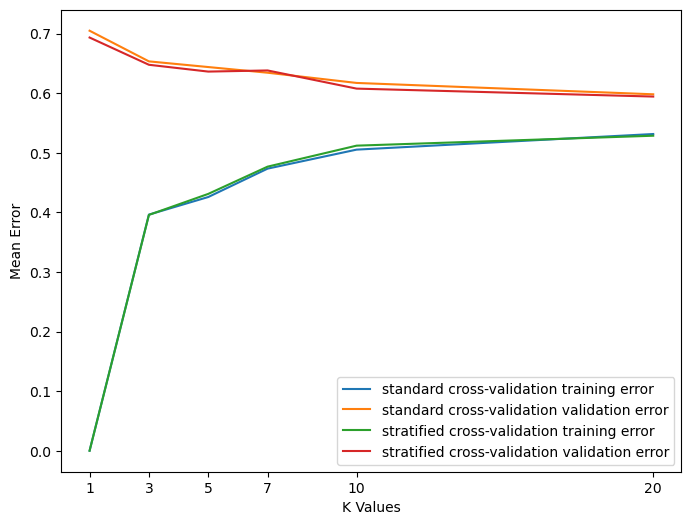

In [10]:


x = k_values
y1 = std_train_error
y2 = std_val_error
y3 = strd_train_error
y4 = strd_val_error

plt.figure(figsize=(8, 6)) 

plt.plot(x, y1, label='standard cross-validation training error')
plt.plot(x, y2, label='standard cross-validation validation error')
plt.plot(x, y3, label='stratified cross-validation training error')
plt.plot(x, y4, label='stratified cross-validation validation error')

plt.xticks(x)

plt.xlabel('K Values')
plt.ylabel('Mean Error')
plt.legend()

plt.show()

For curve standard cross-validation training error lowest mean error k is 1.
For curve standard cross-validation validation error lowest mean error k is 5.
For curve stratified cross-validation training error lowest mean error k is 1.
For curve stratified cross-validation validation error lowest mean error k is 5.
As K increases model complexity for KNN decreases. 
At k =1 we can observe overfitting.
At k=20 we can observe underfitting.



In [11]:
model = KNN(n_neighbors=5)
model.fit(xtrain,ytrain)
preds = model.predict(xtest)
print("Test Error :",1-accuracy_score(preds,ytest))


Test Error : 0.6417910447761195


**5**

**Classifier 4**

C:\Users\reena\Downloads\Reena Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reena\Downloads\Reena Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reena\Downloads\Reena Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reena\Downloads\Reena Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ree

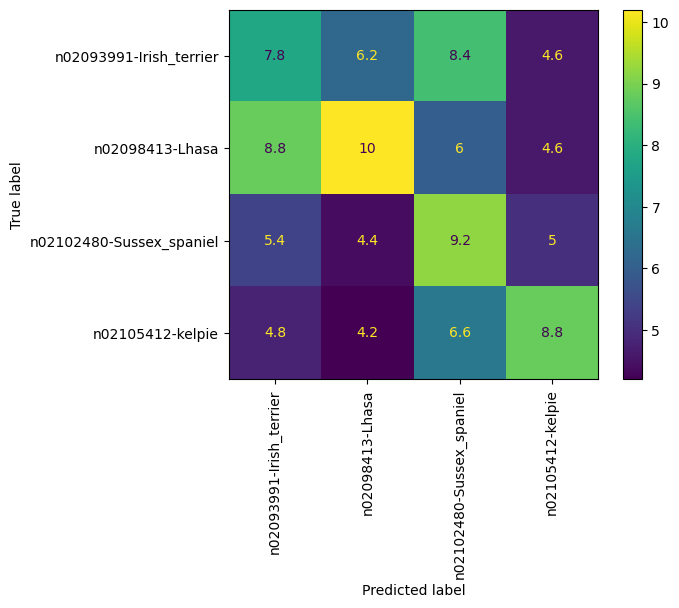

Mean validation accuracy : 0.34285714285714286
Model accuracy : 0.373134328358209
Model F-Measure : 0.3672555887369567
              precision    recall  f1-score   support

           0       0.31      0.24      0.27        34
           1       0.36      0.53      0.43        38
           2       0.37      0.32      0.34        31
           3       0.48      0.39      0.43        31

    accuracy                           0.37       134
   macro avg       0.38      0.37      0.37       134
weighted avg       0.38      0.37      0.37       134



C:\Users\reena\Downloads\Reena Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
nn = MLPClassifier(hidden_layer_sizes=(10,10,10,))
stratified_kf = StratifiedKFold(n_splits=5)

true = []
pred = []
val_acc = []
c_m = []

for train_index, val_index in stratified_kf.split(xtrain, ytrain):
    X_train, X_val = xtrain[train_index], xtrain[val_index]
    y_train, y_val = ytrain[train_index], ytrain[val_index]

    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_val)

    true.extend(y_val)
    pred.extend(y_pred)
    
    val_acc.append(accuracy_score(y_val,y_pred))

    cm = confusion_matrix(y_val,y_pred)
    c_m.append(cm)

# Confusion matrix for 5-fold cross-validation
c_m = sum(c_m)/len(c_m)
cmd = ConfusionMatrixDisplay(c_m, display_labels=classes)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# mean validation accuracies (from the 5-fold cross-validation)
print(f"Mean validation accuracy : {np.mean(val_acc)}")

# Model Accuracy and Model F-Measure
nn.fit(xtrain,ytrain)
preds = nn.predict(xtest)
print(f"Model accuracy : {accuracy_score(ytest,preds)}")
print(f"Model F-Measure : {f1_score(ytest,preds,average='weighted')}")
print(classification_report(ytest,preds))

**classifier 3**

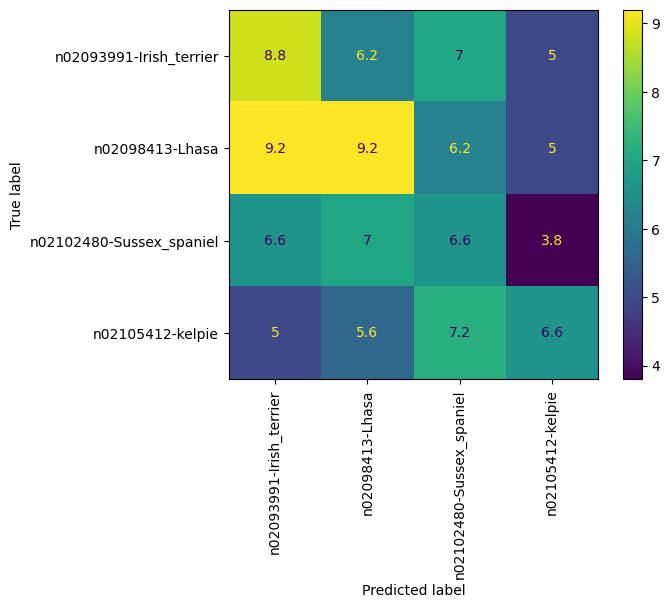

Mean validation accuracy : 0.2971428571428571
Model accuracy : 0.3656716417910448
Model F-Measure : 0.36614615925020644
              precision    recall  f1-score   support

           0       0.42      0.41      0.42        34
           1       0.46      0.47      0.47        38
           2       0.24      0.26      0.25        31
           3       0.32      0.29      0.31        31

    accuracy                           0.37       134
   macro avg       0.36      0.36      0.36       134
weighted avg       0.37      0.37      0.37       134



In [13]:

dt = DecisionTreeClassifier( max_depth=10)
stratified_kf = StratifiedKFold(n_splits=5)

true = []
pred = []
val_acc = []
c_m = []

for train_index, val_index in stratified_kf.split(xtrain, ytrain):
    X_train, X_val = xtrain[train_index], xtrain[val_index]
    y_train, y_val = ytrain[train_index], ytrain[val_index]

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)

    true.extend(y_val)
    pred.extend(y_pred)
    
    val_acc.append(accuracy_score(y_val,y_pred))
    cm = confusion_matrix(y_val,y_pred)
    c_m.append(cm)

# Confusion matrix for 5-fold cross-validation
c_m = sum(c_m)/len(c_m)
cmd = ConfusionMatrixDisplay(c_m, display_labels=classes)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# mean validation accuracies (from the 5-fold cross-validation)
print(f"Mean validation accuracy : {np.mean(val_acc)}")

# Model Accuracy and Model F-Measure
dt.fit(xtrain,ytrain)
preds = dt.predict(xtest)
print(f"Model accuracy : {accuracy_score(ytest,preds)}")
print(f"Model F-Measure : {f1_score(ytest,preds,average='weighted')}")
print(classification_report(ytest,preds))

**classifier 5**

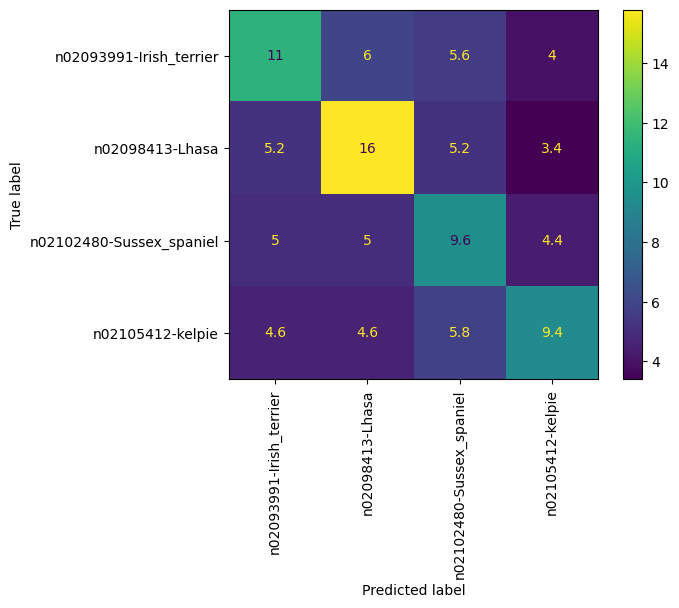

Mean validation accuracy : 0.44000000000000006
Model accuracy : 0.43283582089552236
Model F-Measure : 0.42638483507516567
              precision    recall  f1-score   support

           0       0.39      0.35      0.37        34
           1       0.48      0.61      0.53        38
           2       0.35      0.29      0.32        31
           3       0.48      0.45      0.47        31

    accuracy                           0.43       134
   macro avg       0.42      0.43      0.42       134
weighted avg       0.43      0.43      0.43       134



In [14]:
rfc = RandomForestClassifier()
stratified_kf = StratifiedKFold(n_splits=5)

true = []
pred = []
val_acc = []
c_m = []

for train_index, val_index in stratified_kf.split(xtrain, ytrain):
    X_train, X_val = xtrain[train_index], xtrain[val_index]
    y_train, y_val = ytrain[train_index], ytrain[val_index]

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_val)

    true.extend(y_val)
    pred.extend(y_pred)
    
    val_acc.append(accuracy_score(y_val,y_pred))

    cm = confusion_matrix(y_val,y_pred)
    c_m.append(cm)

# Confusion matrix for 5-fold cross-validation
c_m = sum(c_m)/len(c_m)
cmd = ConfusionMatrixDisplay(c_m, display_labels=classes)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# mean validation accuracies (from the 5-fold cross-validation)
print(f"Mean validation accuracy : {np.mean(val_acc)}")

# Model Accuracy and Model F-Measure
rfc.fit(xtrain,ytrain)
preds = rfc.predict(xtest)
print(f"Model accuracy : {accuracy_score(ytest,preds)}")
print(f"Model F-Measure : {f1_score(ytest,preds,average='weighted')}")
print(classification_report(ytest,preds))

Based on the confusion matrix classifier 5(Random forest) is the best method.because it has more true positive values than the others

Based on the mean validation accuracies (from the 5-fold cross-validation) classifier 5(Random forest) is best

Based on the model accuracy  classifier 5(Random Forest) is best

Based on the model F-measure classifier 5(Random Forest) is best

Reference:https://scikit-learn.org/stable/modules/cross_validation.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
Sokolova et al. (2006) Beyond accuracy, F-score and ROC: a family of discriminant measures for performance evaluation
Powers (2011) Evaluation: From Precision, Recall and F-Measure to ROC, Informedness, Markedness & Correlation
